In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
df = pd.read_csv('loan_dataset.csv')

In [55]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


1. convert loan_status to binary
2. normalizing the data scince it has really big values

In [56]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,0.387097,0.592593,1
1,45,Female,Teacher,Master's,Single,0.238710,0.444444,1
2,28,Male,Student,High School,Single,0.000000,0.111111,0
3,51,Female,Manager,Bachelor's,Married,0.516129,0.814815,1
4,36,Male,Accountant,Bachelor's,Married,0.322581,0.555556,1


In [57]:
x = df[['credit_score', 'income']].values


In [ ]:
def kmeans(x, k, max_iter=1000):
    centroids = x[np.random.choice(range(x.shape[0]), k, replace=False)]
    for _ in range(max_iter):
        labels = np.argmin(np.linalg.norm(x[:, None] - centroids, axis=2), axis=1)
        new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

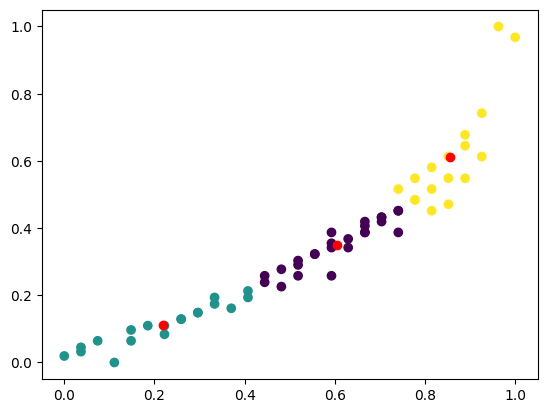

In [59]:
k = 3
centroids, labels = kmeans(x, k)

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


In [132]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def hierarchical_clustering(data, k):
    clusters = [[i] for i in range(len(data))]
    distances = {}

    history = []
    history.append(clusters)

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            distances[(i, j)] = euclidean_distance(data[i], data[j])

    while len(clusters) > k:
        min_dist = float('inf')
        to_merge = None
        for (i, j), dist in distances.items():
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

        cluster1, cluster2 = to_merge
        new_cluster = clusters[cluster1] + clusters[cluster2]

        clusters = [c for idx, c in enumerate(clusters) if idx not in [cluster1, cluster2]]
        clusters.append(new_cluster)

        history.append(clusters)

        new_distances = {}
        for idx, cluster in enumerate(clusters):
            if idx != len(clusters) - 1:
                for other_idx, other_cluster in enumerate(clusters):
                    if idx < other_idx:
                        new_distances[(idx, other_idx)] = np.mean([
                            euclidean_distance(data[i], data[j])
                            for i in cluster
                            for j in other_cluster
                        ])

        distances = new_distances

    return history

def create_labels(data, clusters):
    labels = np.zeros(len(data), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for data_idx in cluster:
            labels[data_idx] = cluster_idx
    return labels


In [135]:
# Use the original data for visualization
# original_x = df[['loan_status', 'income']].values
original_x = df[['credit_score', 'income']].values

tree = hierarchical_clustering(original_x, 1)


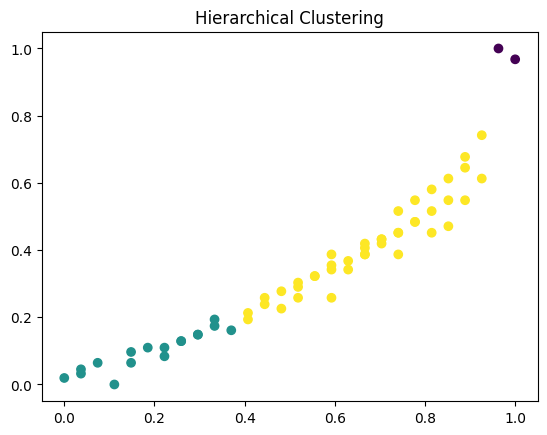

In [140]:
clusters = tree[-3]

labels = create_labels(original_x, clusters)


# Visualization
plt.scatter(original_x[:, 0], original_x[:, 1], c=labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()